In [29]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Literal

In [30]:
class Qstate(TypedDict):
    a:int
    b:int
    c:int

    equation:str
    dis:float
    result:str

In [31]:
graph = StateGraph(Qstate)

In [32]:
def printEQN(state:Qstate)->dict:
    eqn:str=f"{state['a']}x^2+({state['b']})x+({state['c']})"
    return {"equation":eqn}

In [33]:
def calc_dis(state:Qstate)->dict:
    d=(state['b']**2)-(4*state['a']*state['c'])

    return{"dis":d}

In [34]:
def real_roots(state: Qstate):

    root1 = (-state["b"] + state["dis"]**0.5) / (2 * state["a"])
    root2 = (-state["b"] - state["dis"]**0.5) / (2 * state["a"])
    return {"result": f"The roots are root1: {root1} and root2: {root2}"}

In [35]:
def equal_roots(state: Qstate):

    root = -(state["b"])/(2*state["a"])
    return {"result": f"The root is: {root}"}

In [36]:
def img_roots(state: Qstate)->dict:
    return {"result":"Imaginary Roots"}

In [37]:
def check_con(state:Qstate)->Literal["real_roots","equal_roots","img_roots"]:
    if state["dis"]>0:
        return "real_roots"
    elif state["dis"]==0:
        return "equal_roots"
    else:
        return "img_roots"

In [38]:
graph.add_node("show_eqn",printEQN)
graph.add_node("calc_dis",calc_dis)

graph.add_node("real_roots",real_roots)
graph.add_node("equal_roots",equal_roots)
graph.add_node("img_roots",img_roots)

graph.add_edge(START,"show_eqn")
graph.add_edge("show_eqn","calc_dis")
graph.add_conditional_edges("calc_dis",check_con)
graph.add_edge("real_roots",END)
graph.add_edge("img_roots",END)
graph.add_edge("equal_roots",END)

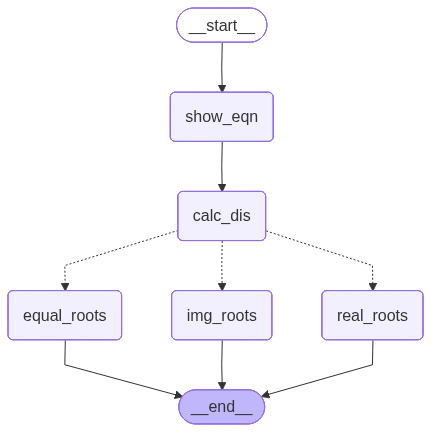

In [39]:
workflow=graph.compile()
workflow

In [43]:
inital_state={"a":5,"b":9,"c":3}
workflow.invoke(inital_state)

{'a': 5,
 'b': 9,
 'c': 3,
 'equation': '5x^2+(9)x+(3)',
 'dis': 21,
 'result': 'The roots are root1: -0.44174243050441603 and root2: -1.3582575694955838'}